In [1]:
import numpy as np
import requests
import matplotlib.pyplot as plt

# need to package things with setup.py?
# below is a temporary hack
import sys
sys.path.append('../')
from utils import remap

In [2]:
# get a diffraction pattern from IUCR
r = requests.get('https://www.iucr.org/__data/iucr/powder/QARR/col/cpd-y2o3.prn')

In [3]:
# parse the response
pattern_prn_str = r.content.decode()
pattern_x = list()
pattern_y = list()
for row in pattern_prn_str.split('\r\n'):
    vals = row.split()
    if len(vals) == 2:
        pattern_x.append(float(vals[0]))
        pattern_y.append(float(vals[1]))

In [4]:
print(min(pattern_x),max(pattern_x))

5.0 150.0


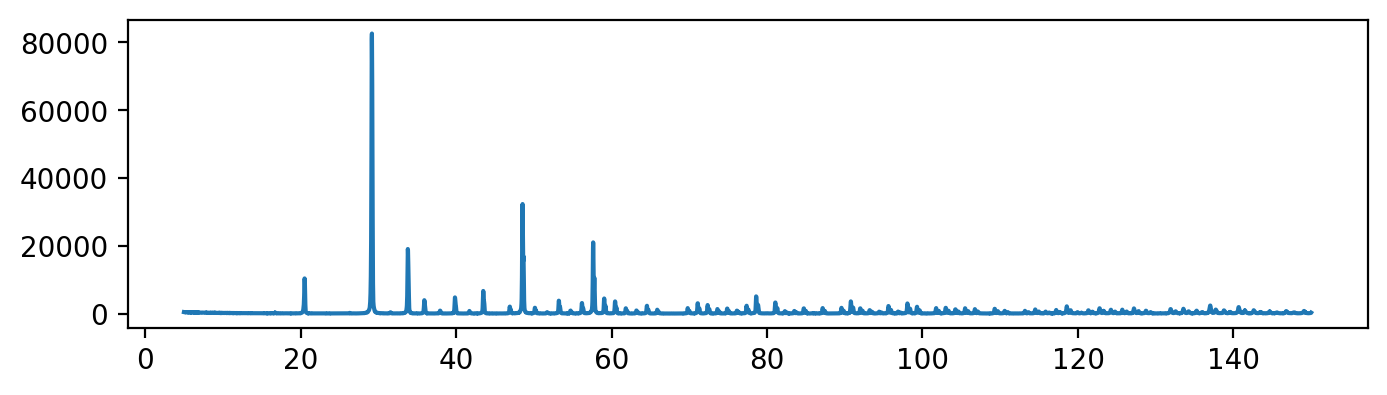

In [5]:
fig, ax = plt.subplots(figsize=(8, 2), dpi=200)
ax.plot(pattern_x, pattern_y)
plt.show()

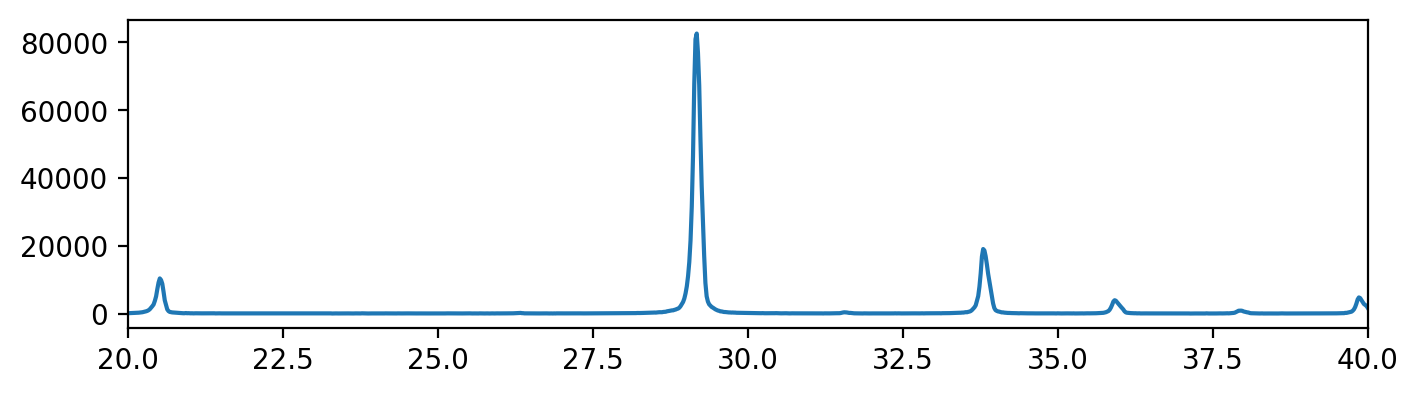

In [6]:
fig, ax = plt.subplots(figsize=(8, 2), dpi=200)
ax.plot(pattern_x, pattern_y)
plt.xlim(20,40) 
plt.show()

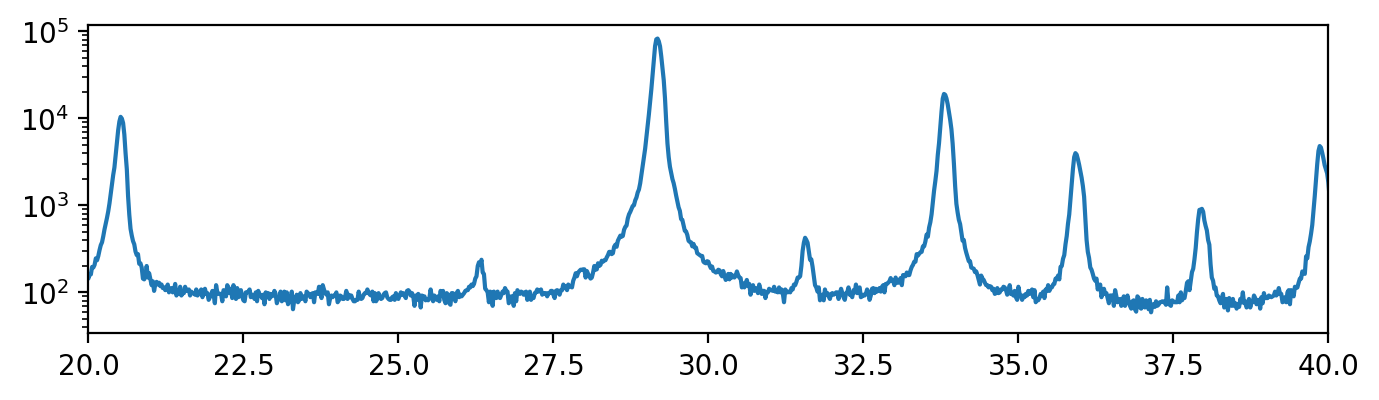

In [7]:
fig, ax = plt.subplots(figsize=(8, 2), dpi=200)
ax.set_yscale('log')
ax.plot(pattern_x, pattern_y)
plt.xlim(20,40) 
plt.show()

In [8]:
def plot_rescale_sparse(x1,y1,start,stop,num):
    buff_fact = 0.05
    buff_x = (stop - start) * buff_fact
    new_x = list(np.linspace(start, stop, num=num, endpoint=True))
    new_y = remap.rescale_2d_data_linear(pattern_x,pattern_y,new_x)

    y_max = max(new_y)
    y_min = min(new_y)
    buff_y = (y_max - y_min) * buff_fact

    fig, ax = plt.subplots(figsize=(8, 2), dpi=200)
    ax.plot(x1, y1,'b-')
    ax.plot(new_x, new_y,'ro')
    plt.xlim(start-buff_x,stop+buff_x)
    plt.ylim(y_min-buff_y,y_max+buff_y)
    plt.show()

    fig, ax = plt.subplots(figsize=(8, 2), dpi=200)
    ax.set_yscale('log')
    ax.plot(x1, y1,'b-')
    ax.plot(new_x, new_y,'ro')
    plt.xlim(start-buff_x,stop+buff_x)
    plt.ylim(y_min*(1-buff_fact),y_max*(1+buff_fact)) 
    plt.show()

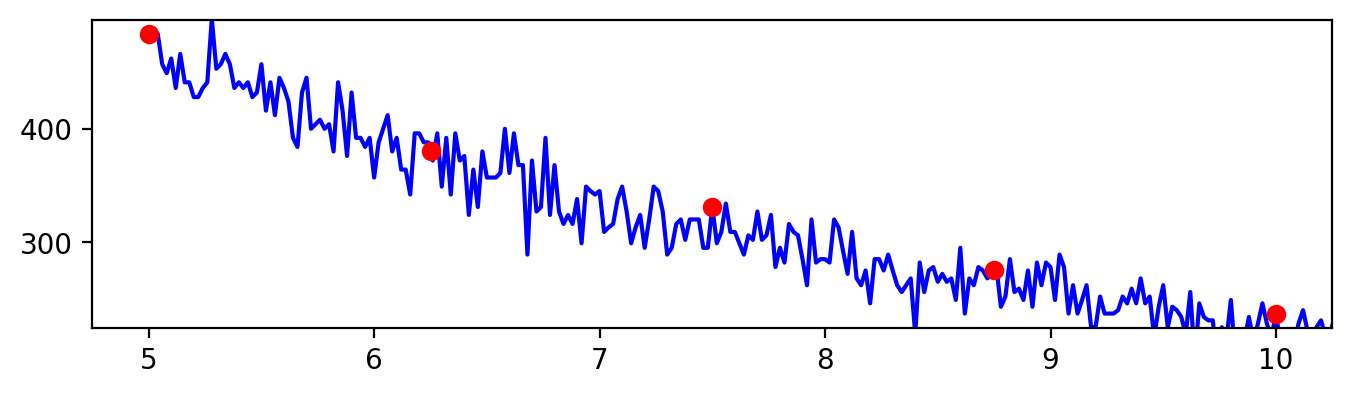

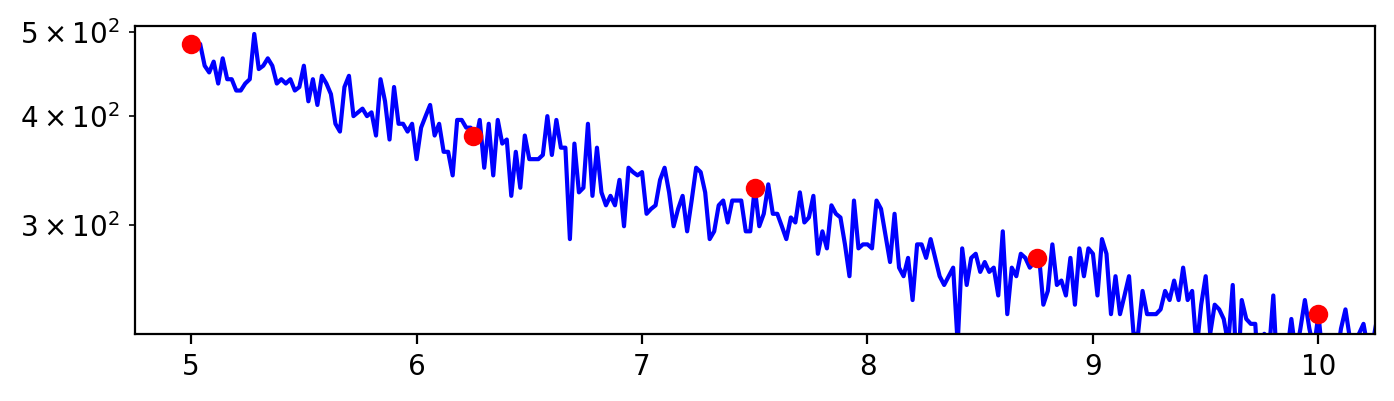

In [9]:
# Test start of data
plot_rescale_sparse(pattern_x,pattern_y,5.0,10.0,5)

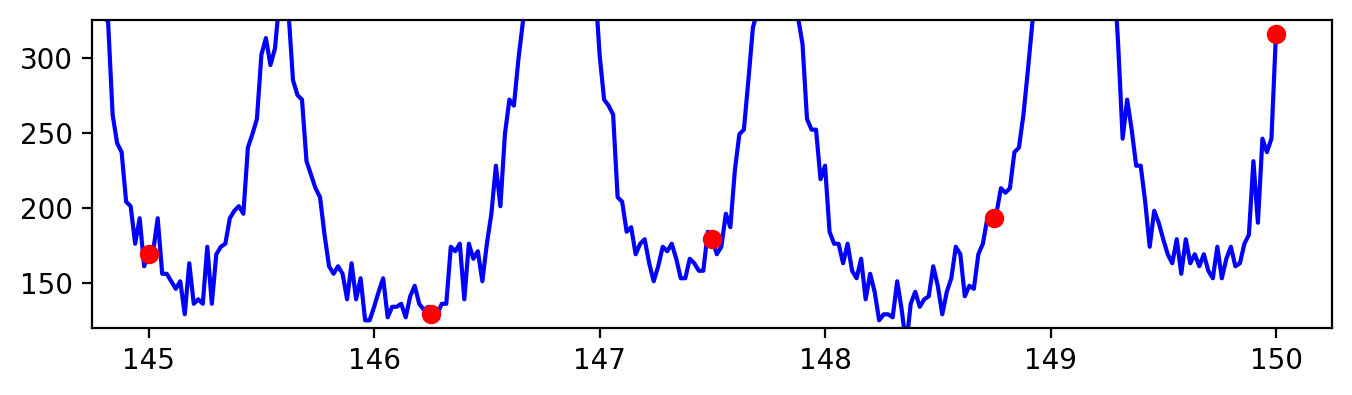

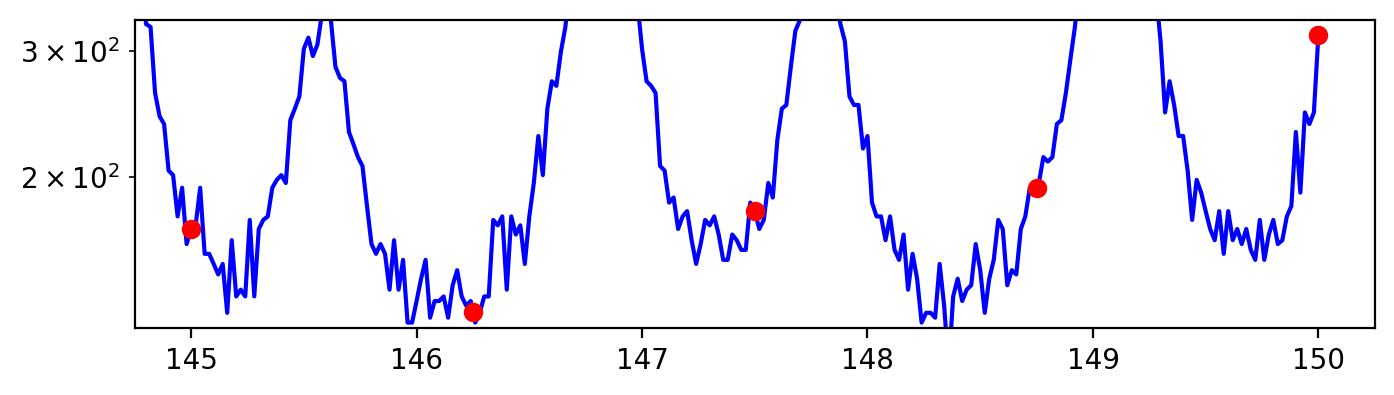

In [10]:
# Test end of data
plot_rescale_sparse(pattern_x,pattern_y,145.0,150.0,5)

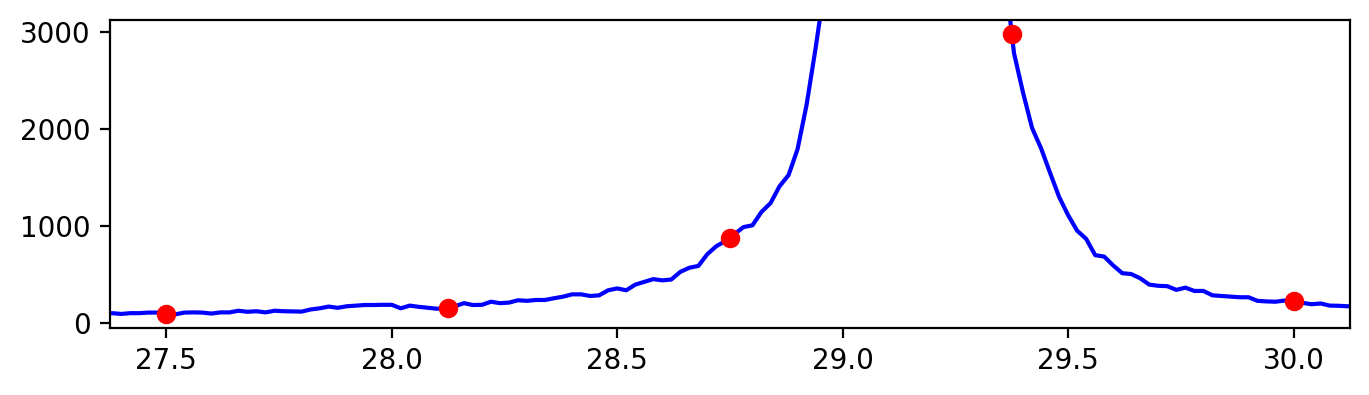

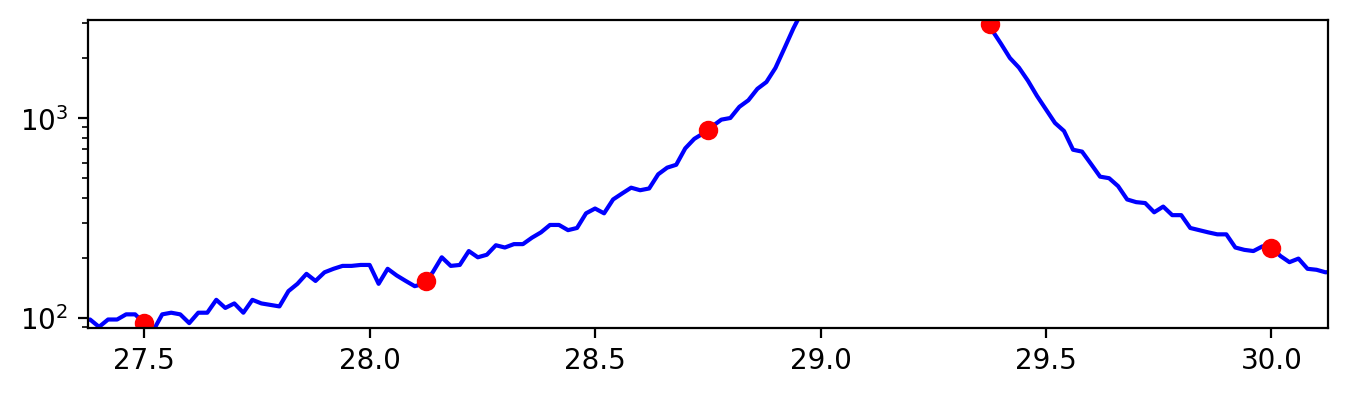

In [11]:
# Test peak very sparse
plot_rescale_sparse(pattern_x,pattern_y,27.5,30.0,5)

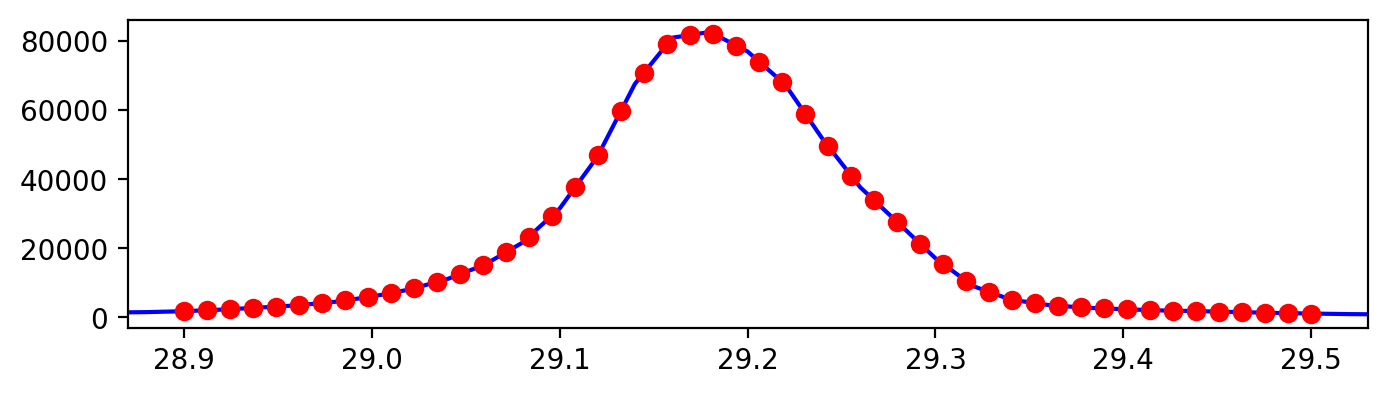

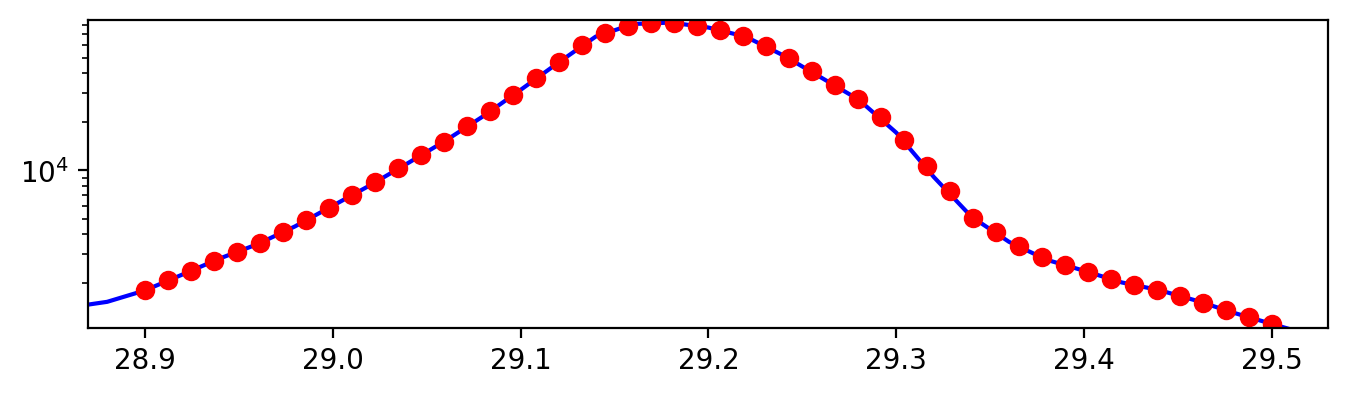

In [12]:
# Test peak less sparse
plot_rescale_sparse(pattern_x,pattern_y,28.9,29.5,50)

In [13]:
def plot_rescale_dense(x1,y1,start,stop,num):
    buff_fact = 0.05
    buff_x = (stop - start) * buff_fact
    new_x = list(np.linspace(start, stop, num=num, endpoint=True))
    new_y = remap.rescale_2d_data_linear(pattern_x,pattern_y,new_x)

    y_max = max(new_y)
    y_min = min(new_y)
    buff_y = (y_max - y_min) * buff_fact

    fig, ax = plt.subplots(figsize=(8, 2), dpi=200)
    ax.plot(new_x, new_y,'r-')
    ax.plot(x1, y1,'bo')
    plt.xlim(start-buff_x,stop+buff_x)
    plt.ylim(y_min-buff_y,y_max+buff_y)
    plt.show()

    fig, ax = plt.subplots(figsize=(8, 2), dpi=200)
    ax.set_yscale('log')
    ax.plot(new_x, new_y,'r-')
    ax.plot(x1, y1,'bo')
    plt.xlim(start-buff_x,stop+buff_x)
    plt.ylim(y_min*(1-buff_fact),y_max*(1+buff_fact)) 
    plt.show()

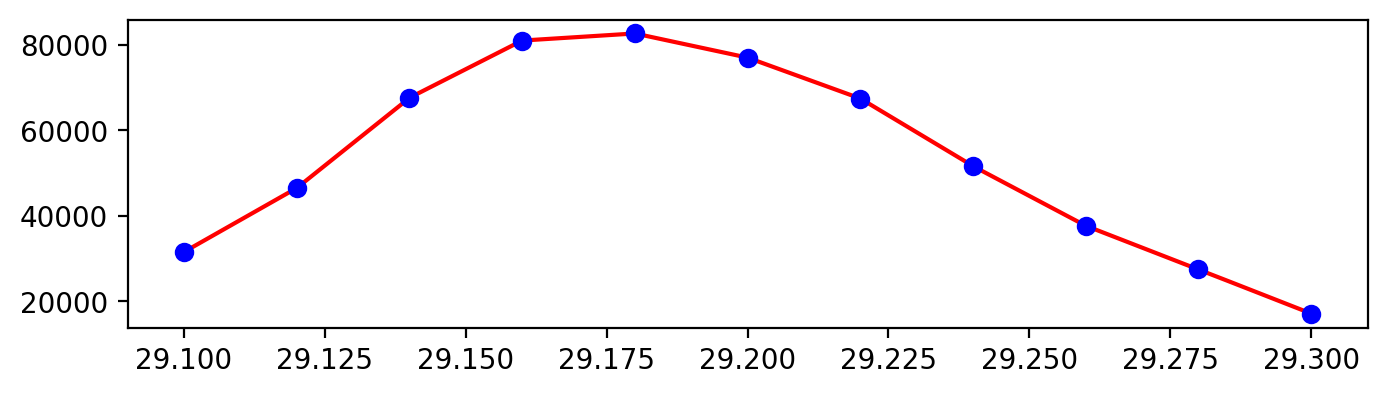

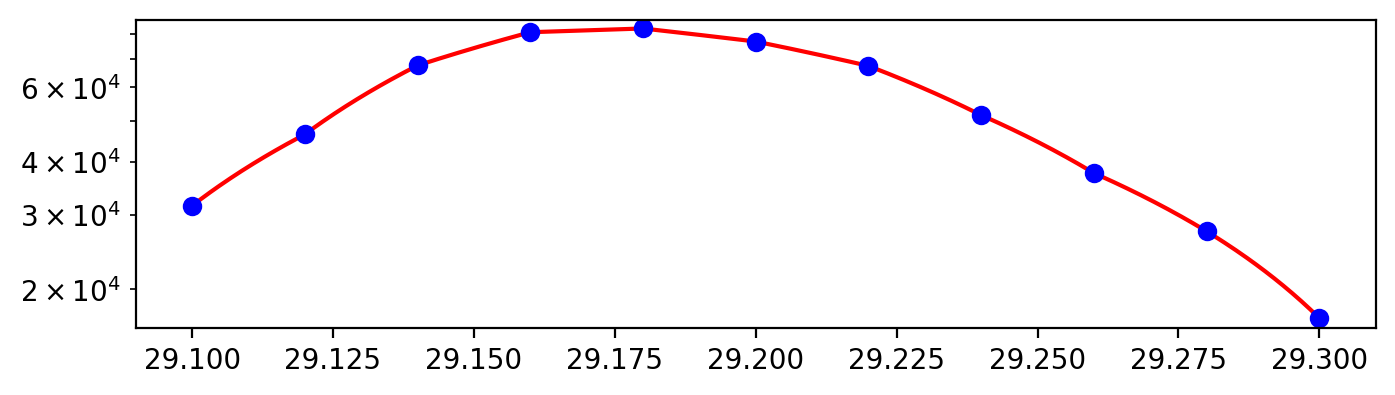

In [14]:
plot_rescale_dense(pattern_x,pattern_y,29.1,29.3,500)